# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

# Pandas Advanced 

> ### INDEX
> - Plotting (그래프)
> - Getting Data In / Out (데이터 입 / 출력)
> - Gotchas (잡았다!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 11. Plotting (그래프)

> - 데이터프레임에서 plot() 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리합니다.

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01    2.171264
2020-01-02   -0.947730
2020-01-03   -1.449293
2020-01-04   -0.001280
2020-01-05    1.814985
                ...   
2022-09-22    0.813036
2022-09-23    0.233741
2022-09-24    0.733935
2022-09-25   -1.642543
2022-09-26   -1.248156
Freq: D, Length: 1000, dtype: float64

In [3]:
type(ts)

pandas.core.series.Series

In [4]:
ts.head()

2020-01-01    2.171264
2020-01-02   -0.947730
2020-01-03   -1.449293
2020-01-04   -0.001280
2020-01-05    1.814985
Freq: D, dtype: float64

In [5]:
ts = ts.cumsum()
ts

2020-01-01    2.171264
2020-01-02    1.223535
2020-01-03   -0.225758
2020-01-04   -0.227038
2020-01-05    1.587947
                ...   
2022-09-22   -5.274001
2022-09-23   -5.040260
2022-09-24   -4.306325
2022-09-25   -5.948868
2022-09-26   -7.197024
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

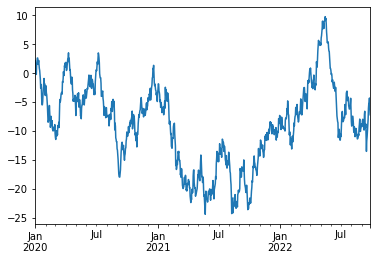

In [6]:
ts.plot()

In [7]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 
df

,A,B,C,D
2020-01-01,0.296207,-0.010417,-0.224054,-0.004909
2020-01-02,-1.241740,-2.110385,-0.843597,-1.449004
2020-01-03,0.895009,-1.085535,-1.666529,-0.871635
2020-01-04,0.185353,-0.423882,0.218918,0.722138
2020-01-05,-0.103646,-0.193937,0.747776,-0.192003
...,...,...,...,...
2022-09-22,0.239589,-0.133321,0.456411,-0.429524
2022-09-23,-0.656487,-0.243409,1.227130,0.699845
2022-09-24,0.205564,-0.055943,1.626650,1.199557
2022-09-25,-0.386050,-0.663372,-0.519518,-1.461882


In [8]:
df = df.cumsum()
df

,A,B,C,D
2020-01-01,0.296207,-0.010417,-0.224054,-0.004909
2020-01-02,-0.945534,-2.120802,-1.067651,-1.453913
2020-01-03,-0.050525,-3.206337,-2.734181,-2.325548
2020-01-04,0.134828,-3.630219,-2.515263,-1.603409
2020-01-05,0.031182,-3.824156,-1.767487,-1.795413
...,...,...,...,...
2022-09-22,-18.899409,0.491772,26.284700,13.149420
2022-09-23,-19.555896,0.248363,27.511830,13.849265
2022-09-24,-19.350332,0.192420,29.138479,15.048823
2022-09-25,-19.736382,-0.470953,28.618961,13.586941


<Figure size 432x288 with 0 Axes>

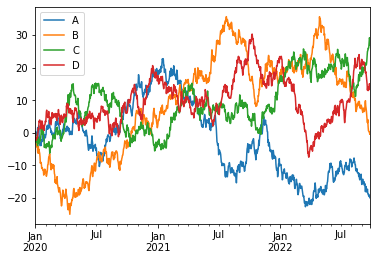

In [9]:
plt.figure()
df.plot()
plt.legend(loc='best')

## 12. Getting Data In / Out (데이터 입 / 출력)

> - 파일 저장
> - 파일 로딩

In [10]:
df

,A,B,C,D
2020-01-01,0.296207,-0.010417,-0.224054,-0.004909
2020-01-02,-0.945534,-2.120802,-1.067651,-1.453913
2020-01-03,-0.050525,-3.206337,-2.734181,-2.325548
2020-01-04,0.134828,-3.630219,-2.515263,-1.603409
2020-01-05,0.031182,-3.824156,-1.767487,-1.795413
...,...,...,...,...
2022-09-22,-18.899409,0.491772,26.284700,13.149420
2022-09-23,-19.555896,0.248363,27.511830,13.849265
2022-09-24,-19.350332,0.192420,29.138479,15.048823
2022-09-25,-19.736382,-0.470953,28.618961,13.586941


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2020-01-01 to 2022-09-26
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
 3   D       1000 non-null   float64
dtypes: float64(4)
memory usage: 39.1 KB


- csv 파일

In [12]:
df.to_csv('data/foo.csv')

In [13]:
csv_df = pd.read_csv('data/foo.csv')

In [14]:
csv_df.head(10)

,Unnamed: 0,A,B,C,D
0,2020-01-01,0.296207,-0.010417,-0.224054,-0.004909
1,2020-01-02,-0.945534,-2.120802,-1.067651,-1.453913
2,2020-01-03,-0.050525,-3.206337,-2.734181,-2.325548
3,2020-01-04,0.134828,-3.630219,-2.515263,-1.603409
4,2020-01-05,0.031182,-3.824156,-1.767487,-1.795413
5,2020-01-06,-0.778969,-4.379880,-3.043958,-1.674438
6,2020-01-07,0.097895,-3.840333,-3.254557,-1.499508
7,2020-01-08,1.561631,-5.904219,-3.963814,-0.850323
8,2020-01-09,0.206824,-6.246815,-2.424278,0.404180
9,2020-01-10,0.396278,-4.173847,-1.301606,1.459633


- HDF5 파일

In [15]:
df.to_hdf('data/foo.h5','df')

In [16]:
h5_df = pd.read_hdf('data/foo.h5','df')

In [17]:
h5_df.head()

,A,B,C,D
2020-01-01,0.296207,-0.010417,-0.224054,-0.004909
2020-01-02,-0.945534,-2.120802,-1.067651,-1.453913
2020-01-03,-0.050525,-3.206337,-2.734181,-2.325548
2020-01-04,0.134828,-3.630219,-2.515263,-1.603409
2020-01-05,0.031182,-3.824156,-1.767487,-1.795413


- Excel 파일

In [18]:
df.to_excel('data/foo.xlsx', sheet_name='Sheet1')

In [19]:
excel_df = pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

In [20]:
excel_df.head()

,Unnamed: 0,A,B,C,D
0,2020-01-01,0.296207,-0.010417,-0.224054,-0.004909
1,2020-01-02,-0.945534,-2.120802,-1.067651,-1.453913
2,2020-01-03,-0.050525,-3.206337,-2.734181,-2.325548
3,2020-01-04,0.134828,-3.630219,-2.515263,-1.603409
4,2020-01-05,0.031182,-3.824156,-1.767487,-1.795413


In [21]:
df.head()

,A,B,C,D
2020-01-01,0.296207,-0.010417,-0.224054,-0.004909
2020-01-02,-0.945534,-2.120802,-1.067651,-1.453913
2020-01-03,-0.050525,-3.206337,-2.734181,-2.325548
2020-01-04,0.134828,-3.630219,-2.515263,-1.603409
2020-01-05,0.031182,-3.824156,-1.767487,-1.795413


## 13. Gotchas (잡았다!)

```python

# 연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.
if pd.Series([False, True, False]):
    print("I was true")
   
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Input In [30], in <cell line: 2>()
      1 # 연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.
----> 2 if pd.Series([False, True, False]):
      3     print("I was true")

File C:\Python\anaconda3\lib\site-packages\pandas\core\generic.py:1527, in NDFrame.__nonzero__(self)
   1525 @final
   1526 def __nonzero__(self):
-> 1527     raise ValueError(
   1528         f"The truth value of a {type(self).__name__} is ambiguous. "
   1529         "Use a.empty, a.bool(), a.item(), a.any() or a.all()."
   1530     )

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
    
   
```

In [22]:
# 이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택 (반영)해주어야 합니다.

if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None


In [23]:
bools = pd.Series([False, True, False])
bools

0    False
1     True
2    False
dtype: bool

In [24]:
bools.all()

False

In [25]:
bools.any()

True

In [26]:
bools.empty

False

In [27]:
bools = pd.Series([ True, True, True ])

In [28]:
bools.all(), bools.any(), bools.empty

(True, True, False)

In [29]:
bools = pd.Series([ False, False, False ])
bools.all(), bools.any(), bools.empty

(False, False, False)

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>